In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
# 2. LOAD YOUR DATASET
data = pd.read_csv("heart_disease_uci.csv")

In [ ]:
# 3. PREPARE FEATURES & TARGET
print("Columns in the DataFrame:", data.columns.tolist())
X = data.drop("num", axis=1)
y = data["num"]

Columns in the DataFrame: ['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


In [ ]:

if 'id' in X.columns:
    X = X.drop('id', axis=1)
for col in ['ca', 'thal']:
    if col in X.columns:
        X[col] = pd.to_numeric(X[col], errors='coerce')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_cols = X_train.select_dtypes(include='object').columns

numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
cols_to_drop_completely = []

for col in numerical_cols:
    if X_train[col].isnull().any():
        median_val = X_train[col].median()
        if pd.notna(median_val):
            X_train[col] = X_train[col].fillna(median_val)
            X_test[col] = X_test[col].fillna(median_val)
        else:
            cols_to_drop_completely.append(col)
if cols_to_drop_completely:
    X_train = X_train.drop(columns=cols_to_drop_completely)
    X_test = X_test.drop(columns=cols_to_drop_completely)

categorical_cols = X_train.select_dtypes(include='object').columns

X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

missing_in_test = set(X_train_encoded.columns) - set(X_test_encoded.columns)
for c in missing_in_test:
    X_test_encoded[c] = 0

extra_in_test = set(X_test_encoded.columns) - set(X_train_encoded.columns)
for c in extra_in_test:
    X_test_encoded = X_test_encoded.drop(c, axis=1)

X_test_encoded = X_test_encoded[X_train_encoded.columns]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [ ]:
# 5. INITIALIZE MODELS
log_reg = LogisticRegression(max_iter=1000, random_state=42)
svm_clf = SVC(kernel="linear", probability=True, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
lin_reg = LinearRegression()

models = {
    "Logistic Regression": log_reg,
    "SVM (Linear)": svm_clf,
    "Random Forest": rf_clf,
    "Linear Regression (Thresh)": lin_reg
}

In [ ]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
svm_clf = SVC(kernel="linear", probability=True, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
lin_reg = LinearRegression()

models = {
    "Logistic Regression": log_reg,
    "SVM (Linear)": svm_clf,
    "Random Forest": rf_clf,
    "Linear Regression (Thresh)": lin_reg
}


In [ ]:
label_mapping = {0: 0, 1: 1, 2: 1, 3: 1, 4: 1}
y_train_numeric = y_train.map(label_mapping)
y_test_numeric = y_test.map(label_mapping)

for name, model in models.items():
    model.fit(X_train_scaled, y_train_numeric)

    if name == "Linear Regression (Thresh)":
        y_cont = model.predict(X_test_scaled)
        y_pred = (y_cont > 0.5).astype(int)
    else:
        y_pred = model.predict(X_test_scaled)

    print(f"\n=== {name} ===")
    print("Accuracy   :", round(accuracy_score(y_test_numeric, y_pred)*100, 2), "%")
    print("Precision  :", round(precision_score(y_test_numeric, y_pred, zero_division=0)*100, 2), "%")
    print("Recall     :", round(recall_score(y_test_numeric, y_pred, zero_division=0)*100, 2), "%")
    print("F1 Score   :", round(f1_score(y_test_numeric, y_pred, zero_division=0)*100, 2), "%")
    print("Confusion Matrix:\n", confusion_matrix(y_test_numeric, y_pred))


=== Logistic Regression ===
Accuracy   : 82.07 %
Precision  : 86.54 %
Recall     : 82.57 %
F1 Score   : 84.51 %
Confusion Matrix:
 [[61 14]
 [19 90]]

=== SVM (Linear) ===
Accuracy   : 81.52 %
Precision  : 86.41 %
Recall     : 81.65 %
F1 Score   : 83.96 %
Confusion Matrix:
 [[61 14]
 [20 89]]

=== Random Forest ===
Accuracy   : 83.7 %
Precision  : 89.9 %
Recall     : 81.65 %
F1 Score   : 85.58 %
Confusion Matrix:
 [[65 10]
 [20 89]]

=== Linear Regression (Thresh) ===
Accuracy   : 82.07 %
Precision  : 87.25 %
Recall     : 81.65 %
F1 Score   : 84.36 %
Confusion Matrix:
 [[62 13]
 [20 89]]


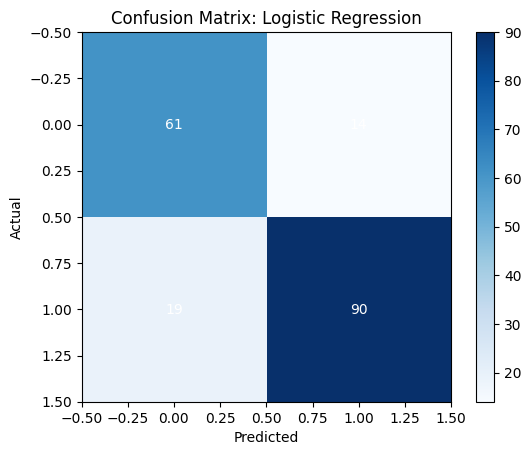

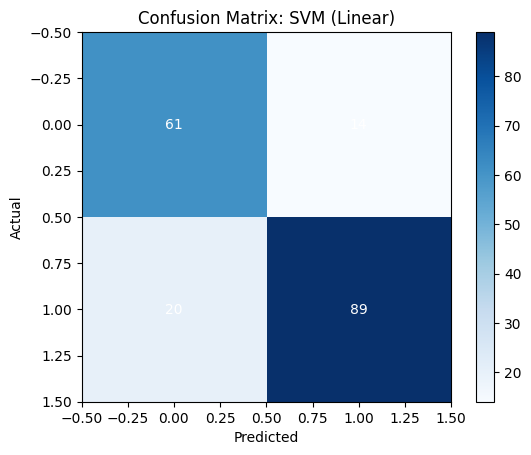

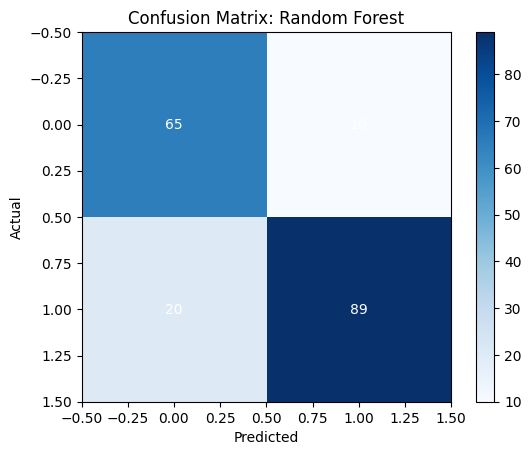

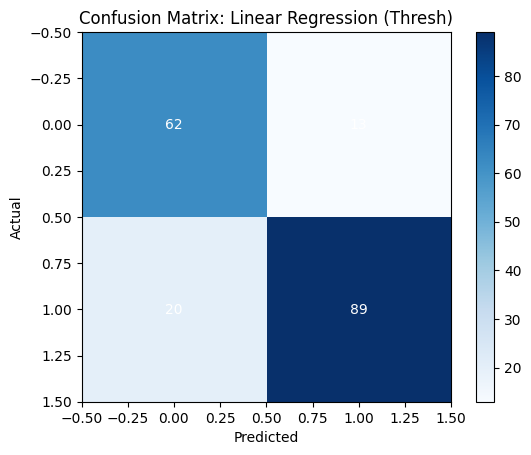

In [ ]:
model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

label_mapping = {0: 0, 1: 1, 2: 1, 3: 1, 4: 1}
y_train_numeric = y_train.map(label_mapping).dropna()
y_test_numeric = y_test.map(label_mapping).dropna()

for name, model in models.items():
    model.fit(X_train_scaled, y_train_numeric)

    if name == "Linear Regression (Thresh)":
        pred_cont = model.predict(X_test_scaled)
        y_pred = (pred_cont > 0.5).astype(int)
    else:
        y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test_numeric, y_pred)
    prec = precision_score(y_test_numeric, y_pred, zero_division=0)
    rec = recall_score(y_test_numeric, y_pred, zero_division=0)
    f1 = f1_score(y_test_numeric, y_pred, zero_division=0)

    model_names.append(name)
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)
    cm = confusion_matrix(y_test_numeric, y_pred)
    plt.figure()
    plt.title(f"Confusion Matrix: {name}")
    plt.imshow(cm, cmap="Blues")
    plt.colorbar()
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha="center", va="center", color="white")
    plt.show()

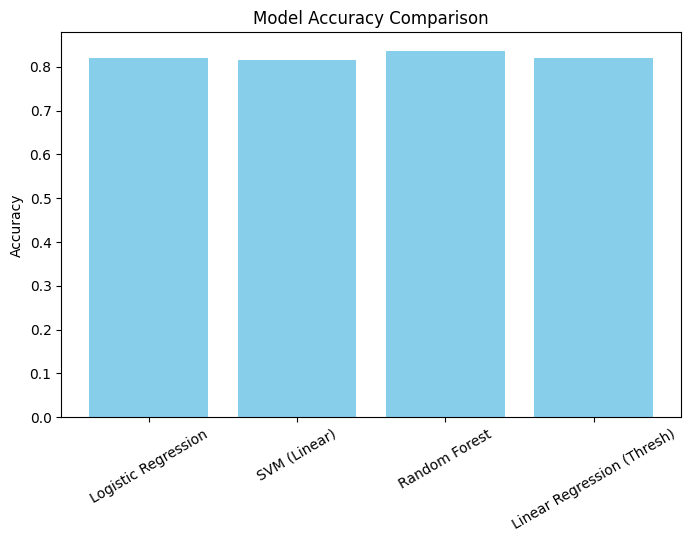

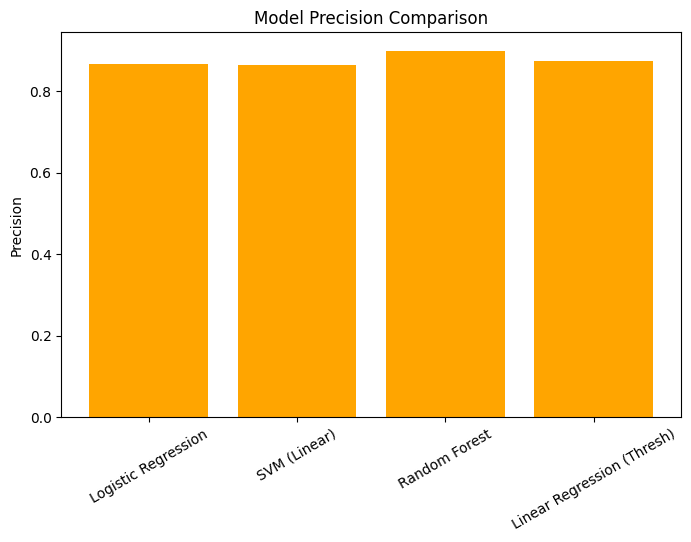

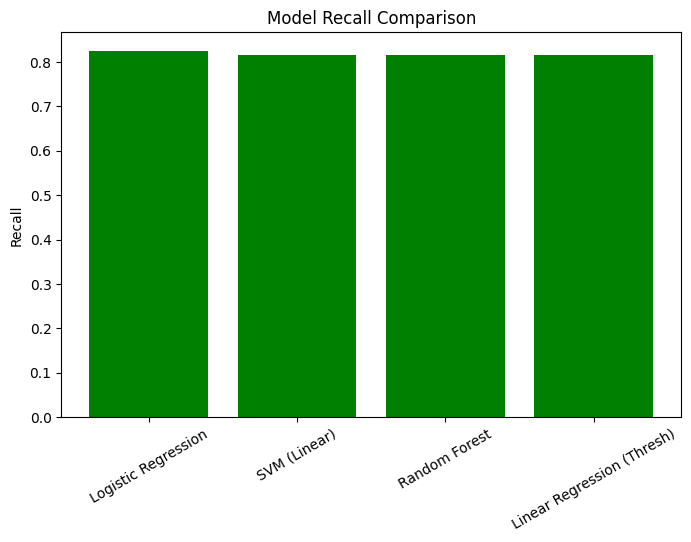

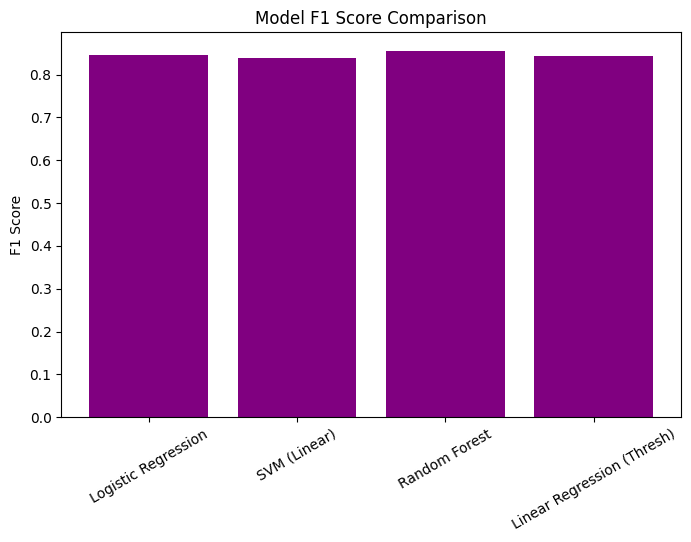

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color="skyblue")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(model_names, precisions, color="orange")
plt.title("Model Precision Comparison")
plt.ylabel("Precision")
plt.xticks(rotation=30)
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(model_names, recalls, color="green")
plt.title("Model Recall Comparison")
plt.ylabel("Recall")
plt.xticks(rotation=30)
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(model_names, f1_scores, color="purple")
plt.title("Model F1 Score Comparison")
plt.ylabel("F1 Score")
plt.xticks(rotation=30)
plt.show()